# Exploratory Data Analysis
## CBIS-DDSM Dataset
The Curated Breast Imaging Subset (CBIS) of the Digital Database for Screening Mammography (DDSM) dataset, otherwise known as the CBIS-DDSM dataset, includes decompressed images, data selected and curated by trained mammographers, mass segmentation, bounding boxes, and pathological diagnoses, in Digital Imaging and Communications in Medicine (DICOM) format. 

### Data Splits
Comprised of 753 calcification cases and 891 mass cases, the dataset was split by the Breast Imaging Reporting and Data System (BI-RADS) assement to ensure that the test set contain cases of varying difficult. "Case" in this context, is used to indicate a particular abnormality observed on craniocaudal (CC) and or mediolateral oblique (MLO) views.  Twenty percent of the data were allocated to the test set, and the remainder was reserved for training. Calcification and mass cases were split separately to ensure that equal level of difficulty in both the train and test sets. 

### Digital Images
Full mammography images are distributed as DICOM files including both MLO nad CC views. For each mammogram, binary mask images of the same size as the mammograms delineate the region of interest (ROI) of each abnormality. 

### CBIS-DDSM Metadata
The individual files containing the metadata for calcification and mass training and test sets are:

| # | Dataset                    | Filename                            |
|---|----------------------------|-------------------------------------|
| 1 | Mass Training Set          | mass_case_description_train_set.csv |
| 2 | Mass Test Set              | mass_case_description_test_set.csv  |
| 3 | Calcification Training Set | calc_case_description_train_set.csv |
| 4 | Calcification Test Set     | calc_case_description_test_set.csv  |

#### Mass Metadata
Metadata for each mass abnormality includes:
- Patient Id: The first 7 characters of image filenames in the case file   
- Breast Density: Assessed by radiologists according to BI-RADS category in ranging from 1 to 4, indicating [1,4] 


In [5]:
import matplotlib.pyplot as plt

from bcd.services.visual.config import VisualConfig
from bcd.data.explore.metadata import MassMeta, CalcMeta

In [6]:
CALC_TRAIN_FILEPATH = "data/ext/calc_case_description_train_set.csv"
CALC_TEST_FILEPATH = "data/ext/calc_case_description_test_set.csv"
MASS_TRAIN_FILEPATH = "data/ext/mass_case_description_train_set.csv"
MASS_TEST_FILEPATH = "data/ext/mass_case_description_test_set.csv"
CBIS_DDSM_FILEPATH = "data/ext/CBIS-DDSM-All-doiJNLP-zzWs5zfZ/CBIS-DDSM"

## Calcification Abnormalities

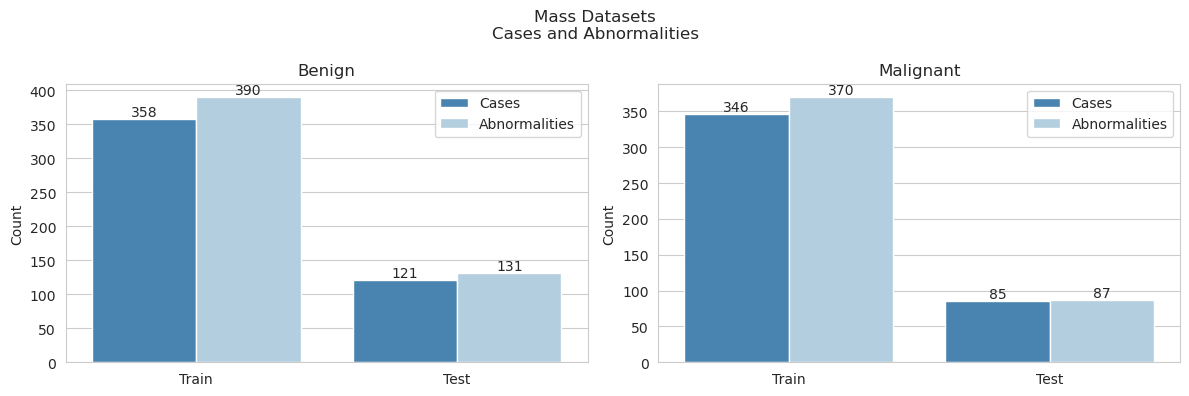

In [7]:
calc = MassMeta(train_filepath=MASS_TRAIN_FILEPATH, test_filepath=MASS_TEST_FILEPATH, name="Mass Datasets")
calc.summary()

In [8]:
import pandas as pd
test = pd.read_csv(CALC_TEST_FILEPATH)
train = pd.read_csv(CALC_TRAIN_FILEPATH)
test = pd.melt(frame=test, value_vars=['pathology'], value_name='Pathology')
test.drop(columns=['variable'], inplace=True)
test['Dataset'] = 'Train'
test

,Pathology,Dataset
0,BENIGN,Train
1,BENIGN,Train
2,BENIGN_WITHOUT_CALLBACK,Train
3,BENIGN_WITHOUT_CALLBACK,Train
4,BENIGN_WITHOUT_CALLBACK,Train
...,...,...
321,MALIGNANT,Train
322,BENIGN,Train
323,BENIGN,Train
324,MALIGNANT,Train
